# Proyek Analisis Data: Bike Sharing
- **Nama:** Ikhzan Wicaksono
- **Email:** wicaksonoikhzan@gmail.com
- **ID Dicoding:** ikhzan_wicaksono

## Menentukan Pertanyaan Bisnis

- Perbandingan setiap musim dengan jumlah peminjaman sepeda
- Sebaran dari peminjaman sepeda berdasarkan musim dan cuacanya

## Import Semua Packages/Library yang Digunakan

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [193]:
day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [194]:
hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berhasil memuat tabel dari dataset day.csv
- Berhasil memuat tabel dari dataset hour.csv

### Assessing Data

##### Menilai tabel day_df

In [195]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [196]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [197]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Menilai tabel hour_df

In [198]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [199]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [200]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua tabel tidak ada missing value dan duplikasi data
- Perlu memperbaiki nama kolom dan juga beberapa elemen di dalamnya

### Cleaning Data

##### Memperbaiki nama kolom pada kedua tabel

In [201]:
kolom_baru = {
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "cnt": "count",
    "weathersit": "weather_condition",
    "hum": "humidity",
    "hr": "hour"
    }

In [202]:
day_df = day_df.rename(columns=kolom_baru)
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [203]:
hour_df = hour_df.rename(columns=kolom_baru)
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Mengganti tipe data season pada kedua tabel

In [204]:
day_df['season'] = day_df['season'].astype('str')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            731 non-null    int64  
 1   date               731 non-null    object 
 2   season             731 non-null    object 
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   holiday            731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   workingday         731 non-null    int64  
 8   weather_condition  731 non-null    int64  
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  humidity           731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  count              731 non-null    int64  
dtypes: float64(4), int64(10), 

In [205]:
hour_df['season'] = hour_df['season'].astype('str')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            17379 non-null  int64  
 1   date               17379 non-null  object 
 2   season             17379 non-null  object 
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  count              173

In [206]:
day_df['weather_condition'] = day_df['weather_condition'].astype('str')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            731 non-null    int64  
 1   date               731 non-null    object 
 2   season             731 non-null    object 
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   holiday            731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   workingday         731 non-null    int64  
 8   weather_condition  731 non-null    object 
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  humidity           731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  count              731 non-null    int64  
dtypes: float64(4), int64(9), o

In [207]:
hour_df['weather_condition'] = hour_df['weather_condition'].astype('str')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            17379 non-null  int64  
 1   date               17379 non-null  object 
 2   season             17379 non-null  object 
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_condition  17379 non-null  object 
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  count              173

##### Memperbaiki elemen season pada kolom season di kedua tabel

In [208]:
day_df["season"] = day_df["season"].replace({
    "1": "spring",
    "2": "summer",
    "3": "fall",
    "4": "winter"
})
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [209]:
hour_df["season"] = hour_df["season"].replace({
    "1": "spring",
    "2": "summer",
    "3": "fall",
    "4": "winter"
})
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Memperbaiki elemen pada kolom year 0 = 2011 dan 1 = 2012

In [210]:
day_df["year"] = day_df["year"].replace({
    0: 2011,
    1: 2012
})
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [211]:
hour_df["year"] = hour_df["year"].replace({
    0: 2011,
    1: 2012
})
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Memperbaiki elemen weather condition pada kolom weather_condition di kedua tabel

In [212]:
day_df["weather_condition"] = day_df["weather_condition"].replace({
    "1": "Clear, Few clouds",
    "2": "Mist, Cloudy",
    "3": "Light Snow, Light Rain",
    "4": "Heavy Rain, Ice Pallets"
})
day_df.tail()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
726,727,2012-12-27,spring,2012,12,0,4,1,"Mist, Cloudy",0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,2012,12,0,5,1,"Mist, Cloudy",0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,2012,12,0,6,0,"Mist, Cloudy",0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,2012,12,0,0,0,"Clear, Few clouds",0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,spring,2012,12,0,1,1,"Mist, Cloudy",0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [213]:
hour_df["weather_condition"] = hour_df["weather_condition"].replace({
    "1": "Clear, Few clouds",
    "2": "Mist, Cloudy",
    "3": "Light Snow, Light Rain",
    "4": "Heavy Rain, Ice Pallets"
})
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,2011,1,0,0,6,0,"Clear, Few clouds",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,1,1,0,6,0,"Clear, Few clouds",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,1,2,0,6,0,"Clear, Few clouds",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,1,3,0,6,0,"Clear, Few clouds",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,1,4,0,6,0,"Clear, Few clouds",0.24,0.2879,0.75,0.0,0,1,1


##### Menggabungkan table day_df dan hour_df

In [214]:
daily_act_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="outer",
    left_on="instant",
    right_on="instant"
)
daily_act_df.head()

,instant,date_x,season_x,year_x,month_x,hour,holiday_x,weekday_x,workingday_x,weather_condition_x,...,weekday_y,workingday_y,weather_condition_y,temp_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,count_y
0,1,2011-01-01,spring,2011,1,0,0,6,0,"Clear, Few clouds",...,6.0,0.0,"Mist, Cloudy",0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,spring,2011,1,1,0,6,0,"Clear, Few clouds",...,0.0,0.0,"Mist, Cloudy",0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,spring,2011,1,2,0,6,0,"Clear, Few clouds",...,1.0,1.0,"Clear, Few clouds",0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,spring,2011,1,3,0,6,0,"Clear, Few clouds",...,2.0,1.0,"Clear, Few clouds",0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,spring,2011,1,4,0,6,0,"Clear, Few clouds",...,3.0,1.0,"Clear, Few clouds",0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [215]:
daily_act_df.isna().sum()

,0
instant,0
date_x,0
season_x,0
year_x,0
month_x,0
hour,0
holiday_x,0
weekday_x,0
workingday_x,0
weather_condition_x,0


**Insight:**
- Sudah memperbaiki nama kolom
- Memperbaiki beberapa tipe data yang lebih cocok dan mengubah elemen yang ada didalamnya

## Exploratory Data Analysis (EDA)

### Explore

#### Exploring tables day_df and hour_df

In [216]:
day_df.sample(5)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
287,288,2011-10-15,winter,2011,10,0,6,0,"Clear, Few clouds",0.506667,0.498725,0.483333,0.258083,1899,3318,5217
316,317,2011-11-13,winter,2011,11,0,0,0,"Clear, Few clouds",0.440833,0.430550,0.458333,0.281721,1004,2713,3717
519,520,2012-06-03,summer,2012,6,0,0,0,"Clear, Few clouds",0.602500,0.575133,0.493333,0.184087,2494,5147,7641
67,68,2011-03-09,spring,2011,3,0,3,1,"Mist, Cloudy",0.295833,0.286608,0.775417,0.220150,191,1700,1891
237,238,2011-08-26,fall,2011,8,0,5,1,"Clear, Few clouds",0.700000,0.659733,0.761250,0.083962,768,3893,4661


In [217]:
day_df.groupby(by="season").instant.count()

,instant
season,
fall,188
spring,181
summer,184
winter,178


<Axes: >

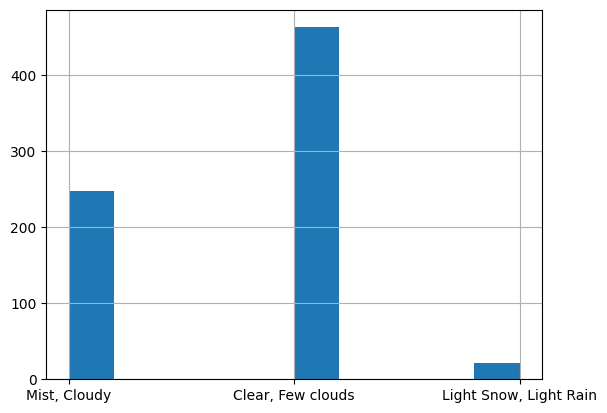

In [218]:
day_df.weather_condition.hist()

In [219]:
hour_df.groupby(by="hour").instant.count()

,instant
hour,
0,726
1,724
2,715
3,697
4,697
5,717
6,725
7,727
8,727


In [220]:
hour_df.groupby(by="season").agg({
    "hour": "median",
    "weather_condition": "unique",
})

,hour,weather_condition
season,,
fall,12.0,"[Clear, Few clouds, Light Snow, Light Rain, Mi..."
spring,12.0,"[Clear, Few clouds, Mist, Cloudy, Light Snow, ..."
summer,12.0,"[Light Snow, Light Rain, Mist, Cloudy, Clear, ..."
winter,12.0,"[Mist, Cloudy, Light Snow, Light Rain, Clear, ..."


In [221]:
day_df.drop('instant', axis=1, inplace=True) # menghapus kolom instant
day_df['temp'] = day_df['temp']*41 # dikalikan 41 sesuai aturan file
day_df['atemp'] = day_df['atemp']*50 # dikalikan 50 sesuai aturan file
day_df['humidity'] = day_df['humidity']*100 # dikalikan 100 sesuai aturan file
day_df['windspeed'] = day_df['windspeed']*100 # dikalikan 100 sesuai aturan file
day_df['windspeed'] = day_df['windspeed']*100 # dikalikan 100 sesuai aturan file
day_df

,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,2011,1,0,6,0,"Mist, Cloudy",14.110847,18.18125,80.5833,1604.46,331,654,985
1,2011-01-02,spring,2011,1,0,0,0,"Mist, Cloudy",14.902598,17.68695,69.6087,2485.39,131,670,801
2,2011-01-03,spring,2011,1,0,1,1,"Clear, Few clouds",8.050924,9.47025,43.7273,2483.09,120,1229,1349
3,2011-01-04,spring,2011,1,0,2,1,"Clear, Few clouds",8.200000,10.60610,59.0435,1602.96,108,1454,1562
4,2011-01-05,spring,2011,1,0,3,1,"Clear, Few clouds",9.305237,11.46350,43.6957,1869.00,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,spring,2012,12,0,4,1,"Mist, Cloudy",10.420847,11.33210,65.2917,3501.33,247,1867,2114
727,2012-12-28,spring,2012,12,0,5,1,"Mist, Cloudy",10.386653,12.75230,59.0000,1554.71,644,2451,3095
728,2012-12-29,spring,2012,12,0,6,0,"Mist, Cloudy",10.386653,12.12000,75.2917,1243.83,159,1182,1341
729,2012-12-30,spring,2012,12,0,0,0,"Clear, Few clouds",10.489153,11.58500,48.3333,3507.54,364,1432,1796


In [222]:
day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,2011,1,0,6,0,"Mist, Cloudy",14.110847,18.18125,80.5833,1604.46,331,654,985
1,2011-01-02,spring,2011,1,0,0,0,"Mist, Cloudy",14.902598,17.68695,69.6087,2485.39,131,670,801
2,2011-01-03,spring,2011,1,0,1,1,"Clear, Few clouds",8.050924,9.47025,43.7273,2483.09,120,1229,1349
3,2011-01-04,spring,2011,1,0,2,1,"Clear, Few clouds",8.200000,10.60610,59.0435,1602.96,108,1454,1562
4,2011-01-05,spring,2011,1,0,3,1,"Clear, Few clouds",9.305237,11.46350,43.6957,1869.00,82,1518,1600


In [223]:
day_df.describe().T # matriksnya di transpos agar lebih mudah dibaca

,count,mean,std,min,25%,50%,75%,max
year,731.0,2011.500684,0.500342,2011.000000,2011.000000,2012.000000,2012.000000,2012.000000
month,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
temp,731.0,20.310776,7.505091,2.424346,13.820424,20.431653,26.872076,35.328347
atemp,731.0,23.717699,8.148059,3.953480,16.892125,24.336650,30.430100,42.044800
humidity,731.0,62.789406,14.242910,0.000000,52.000000,62.666700,73.020850,97.250000
windspeed,731.0,1904.862116,774.978707,223.917000,1349.500000,1809.750000,2332.145000,5074.630000
casual,731.0,848.176471,686.622488,2.000000,315.500000,713.000000,1096.000000,3410.000000


##### Cek apakah ada miss value

In [224]:
day_df.isnull().values.any()

False

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Perbandingan setiap musim dengan jumlah peminjaman sepeda

<ipython-input-225-65f07c375e67>:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(x= "season",hue="weekday", y= "count", join= True, data= day_df)


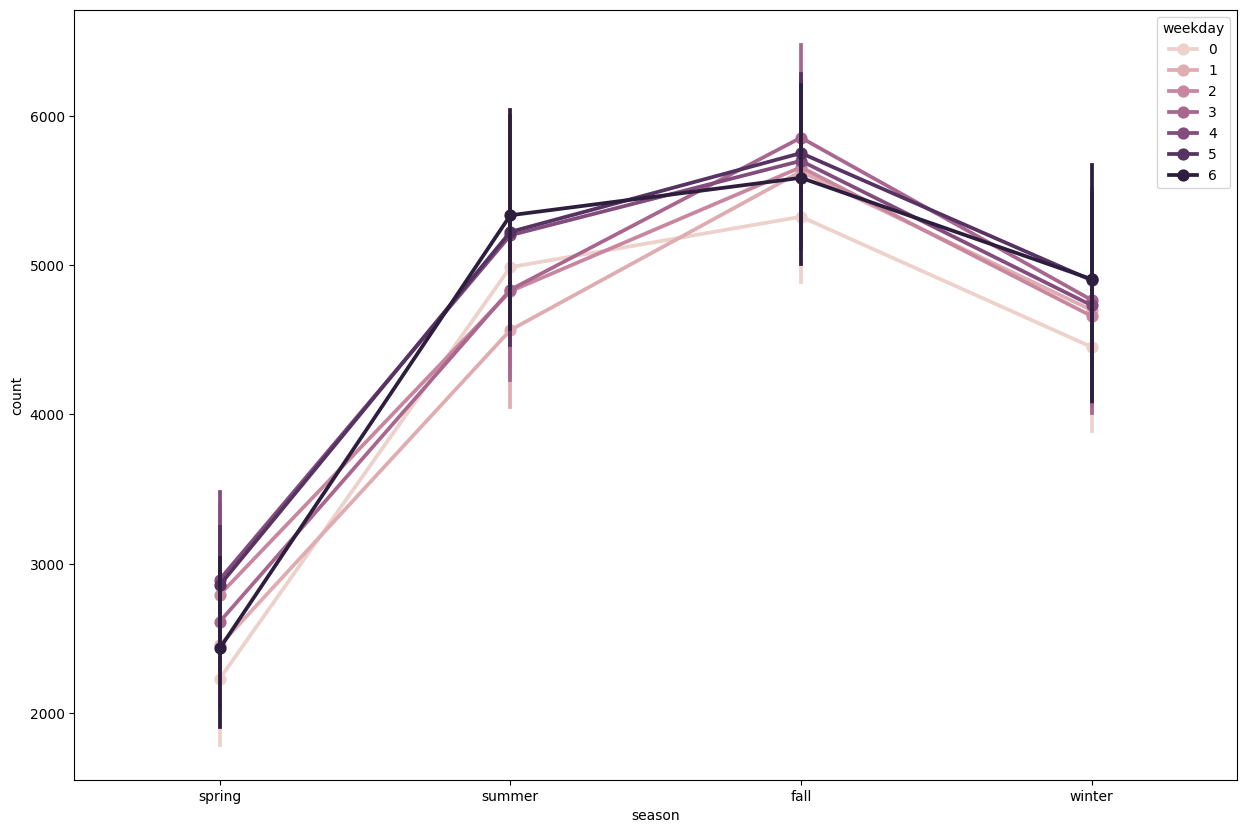

In [225]:
plt.figure(figsize=(15,10))
sns.pointplot(x= "season",hue="weekday", y= "count", join= True, data= day_df)
plt.show()

<ipython-input-226-76d1131cc133>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y= 'count', data= hour_df, palette="magma")


Text(0, 0.5, 'Rentals')

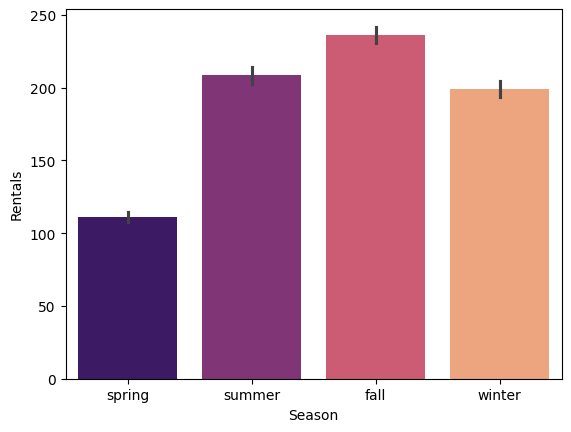

In [226]:
sns.barplot(x='season', y= 'count', data= hour_df, palette="magma")

plt.xlabel("Season")
plt.ylabel("Rentals")

### Pertanyaan 2: Jumlah dari peminjaman sepeda berdasarkan bulan dan cuacanya

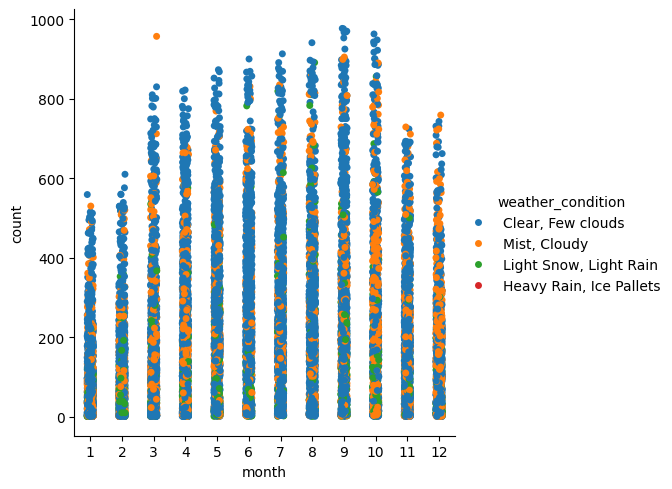

In [227]:
sns.catplot(x='month', y= 'count', hue= 'weather_condition', data= hour_df)

Text(0, 0.5, 'Number of Rentals')

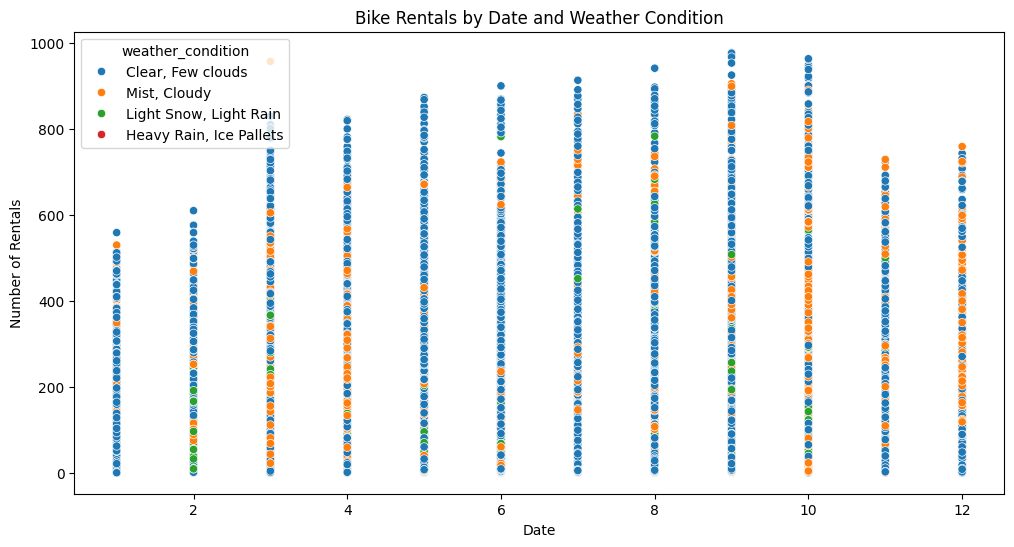

In [228]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="month", y="count", hue="weather_condition", data=hour_df)

plt.title("Bike Rentals by Date and Weather Condition")
plt.xlabel("Date")
plt.ylabel("Number of Rentals")


**Insight:**
- Peminjaman sepeda terjadi paling tinggi saat musim gugur/fall dan paling rendah saat musim semi/spring
- Jumlah peminjam sepeda terbanyak ada pada bulan 9, dengan kebanyakan peminjam menggunakan sepedanya di cuaca cerah dan sedikit berawan

## Analisis Lanjutan (Opsional)

Text(0, 0.5, 'Casual')

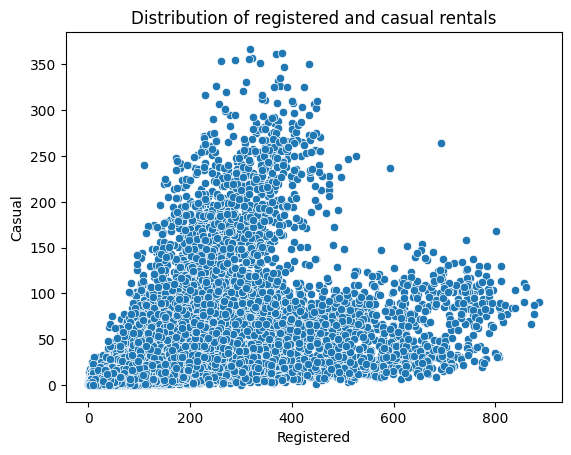

In [229]:
sns.scatterplot(x='registered', y="casual", data=hour_df)
plt.title("Distribution of registered and casual rentals")
plt.xlabel("Registered")
plt.ylabel("Casual")

In [231]:
hour_df.to_csv("all_data.csv", index=False)

## Conclusion

- Jumlah peminjaman sepeda terjadi paling tinggi saat musim gugur/fall dan paling rendah saat musim semi/spring
- Jumlah peminjam sepeda terbanyak ada pada bulan 9, dengan kebanyakan peminjam menggunakan sepedanya di cuaca cerah dan sedikit berawan. Pengguna rental sepeda lebih senang menggunakan sepedanya ketika cuaca cerah

Hal tersebut terjadi karena pada saat musim gugur yang bertepatan antara bulan 7 - 9 cuacanya relatif lebih cerah, dibandingkan dengan bulan 12 dan 1 yang relatif hujan